<a href="https://colab.research.google.com/github/tiedaar/GSU/blob/main/whisper_demo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%%capture
!pip install git+https://github.com/openai/whisper.git
import whisper
import IPython.display as ipd
import time

# Listen to the audio

In [4]:
audio_files = ['english.mp3', 'chinese.mp3']
ipd.Audio(audio_files[1])

# Transcribe the audio

In [7]:
t0 = time.time()
model = whisper.load_model("base")
for i in audio_files:
  result = model.transcribe(i)
  print(i)
  print(result["text"], '\n')

t1 = time.time()
duration = round(t1-t0, 2)
print(f'that took {duration} seconds!')

english.mp3
 Today, while I was eating my breakfast, my dad ran up to me and asked me, Xiao Chuan, today is a very special day. Do you remember? 

chinese.mp3
今天吃早餐的时候,老爸跑来问我,没小川,今天是一个特殊的儿子,你还记得吗? 

that took 2.94 seconds!


# Let's look at it a bit more closely

In [9]:
model = whisper.load_model("base")

# load audio and pad/trim it to fit 30 seconds
audio = whisper.load_audio(audio_files[1])
audio = whisper.pad_or_trim(audio)

# make log-Mel spectrogram and move to the same device as the model
mel = whisper.log_mel_spectrogram(audio).to(model.device)

# detect the spoken language
_, probs = model.detect_language(mel)
print(f"Detected language: {max(probs, key=probs.get)}")

# decode the audio
options = whisper.DecodingOptions(task='translate')
result = whisper.decode(model, mel, options)

# print the recognized text
print(result.text)

Detected language: zh
Today, when I was breakfast, my dad came to ask me, Mi Xiaochuan, is today a special day? Do you still remember?


# Let's take it apart and look at it piece by piece

In [14]:
print(audio)
print(audio.shape)
print('This is the raw audio, sampled at 16,000 Hz')

[0.00500488 0.0067749  0.00854492 ... 0.         0.         0.        ]
(480000,)
This is the raw audio, sampled at 16,000 Hz


In [16]:
print(mel)
print(mel.shape)
print('This is the log-mel spectrograms, broken into 25ms chunks with a stride of 10m')

tensor([[ 0.4799,  0.3348,  0.4011,  ..., -0.9709, -0.9709, -0.9709],
        [ 0.2978,  0.0906,  0.3174,  ..., -0.9709, -0.9709, -0.9709],
        [ 0.2254,  0.1214,  0.2683,  ..., -0.9709, -0.9709, -0.9709],
        ...,
        [-0.7237, -0.7190, -0.8965,  ..., -0.9709, -0.9709, -0.9709],
        [-0.7378, -0.7701, -0.8924,  ..., -0.9709, -0.9709, -0.9709],
        [-0.9344, -0.9261, -0.9569,  ..., -0.9709, -0.9709, -0.9709]],
       device='cuda:0')
torch.Size([80, 3000])
This is the log-mel spectrograms, broken into 25ms chunks with a stride of 10m


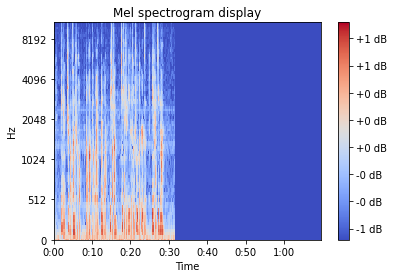

In [33]:
import numpy as np
import matplotlib.pyplot as plt

import librosa
import librosa.display

mel_tensor = mel.to('cpu')
fig, ax = plt.subplots()
img = librosa.display.specshow(np.array(mel_tensor), y_axis='mel', x_axis='time', ax=ax)
ax.set(title='Mel spectrogram display')
fig.colorbar(img, ax=ax, format="%+2.f dB")

In [19]:
print("Here are the logits for detect language")
probs

Here are the logits for detect language


{'en': 0.990965723991394,
 'zh': 0.00040917017031461,
 'de': 0.00023001187946647406,
 'es': 0.0005440532113425434,
 'ru': 0.00024342081451322883,
 'ko': 0.0009621439385227859,
 'fr': 0.0002044884313363582,
 'ja': 0.0019007676746696234,
 'pt': 0.00023725531355012208,
 'tr': 6.711273454129696e-05,
 'pl': 4.534272011369467e-05,
 'ca': 4.63623564428417e-06,
 'nl': 7.460844062734395e-05,
 'ar': 0.00011410339357098565,
 'sv': 5.824997424497269e-05,
 'it': 7.619766256539151e-05,
 'id': 1.8604676370159723e-05,
 'hi': 2.5307643227279186e-05,
 'fi': 7.904419908300042e-05,
 'vi': 5.902265911572613e-05,
 'iw': 3.331261905259453e-05,
 'uk': 4.551907750283135e-06,
 'el': 2.6618014089763165e-05,
 'ms': 0.00010090719297295436,
 'cs': 2.2851852463645628e-06,
 'ro': 8.283747774839867e-06,
 'da': 1.287763279833598e-05,
 'hu': 1.0073598787130322e-05,
 'ta': 6.9273405642888974e-06,
 'no': 3.7768018955830485e-05,
 'th': 9.412789950147271e-05,
 'ur': 1.8881029973272234e-05,
 'hr': 3.266768317189417e-06,
 'bg

In [24]:
result

DecodingResult(audio_features=tensor([[-1.7021, -0.4541, -0.8979,  ..., -1.6133,  0.5049,  0.1301],
        [-0.4368, -0.5166,  0.0149,  ...,  0.4819, -0.4670, -0.1461],
        [-0.1171, -0.5493, -0.3074,  ...,  1.6494, -0.6968,  0.1475],
        ...,
        [-0.4563, -1.1309,  0.2158,  ...,  0.8193, -0.2632,  0.8076],
        [-0.7246, -1.1855,  0.2756,  ...,  0.5220,  0.1924,  0.5488],
        [-1.1445, -1.0059,  1.0205,  ...,  0.5732, -1.5127, -0.9429]],
       device='cuda:0', dtype=torch.float16), language='en', language_probs=None, tokens=[50364, 2692, 11, 1339, 286, 390, 3936, 452, 8201, 11, 452, 3546, 5872, 493, 281, 385, 293, 2351, 385, 11, 50654, 50654, 13134, 761, 6139, 11, 965, 307, 257, 588, 2121, 786, 13, 1144, 291, 1604, 30, 50984], text='Today, while I was eating my breakfast, my dad ran up to me and asked me, Xiao Chuan, today is a very special day. Do you remember?', avg_logprob=-0.32349432431734526, no_speech_prob=0.016252662986516953, temperature=0.0, compression_